In [9]:
!pip install imblearn;


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 19.1 MB/s eta 0:00:00


In [10]:
# import install libraries for pipeline

import subprocess
import sys

# Install the scikit-learn package
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'sagemaker', 'matplotlib', 'xgboost' ])


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c1/cf/a662bc8f40588d54663edfe12980946670490bff0b6e793c7896a4fe36df/xgboost-2.0.0-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 882.6 kB/s eta 0:00:0000:0100:01


0

In [ ]:
## This is for relabeling negative classes as positive if the model thinks they look more positive than negative.

#!pip install pulearn 
from pulearn import (
    ElkanotoPuClassifier,
    # WeightedElkanotoPuClassifier,
)

In [11]:
## this was a simple get_data func for getting multiple datasets that could then be concatenated e.g April + May etc.
def get_data2(bucket, key):
    
    # subfolder in bucket for saving temp data.
    file_path = "training_data"
    
    print('getting data')
    
    s3 = boto3.client('s3')
    obj = s3.get_object(Bucket= bucket, Key= key)
    df = pd.read_csv(io.BytesIO(obj['Body'].read()))
    
    return df

### Main Functional Code

In [48]:
## explicity add region to environment.
import os
os.environ['AWS_DEFAULT_REGION'] = 'eu-west-2'

import sys
import numpy as np
import pandas as pd
import sagemaker
from sagemaker import get_execution_role
from sagemaker.inputs import TrainingInput
from sagemaker.serializers import CSVSerializer
import boto3
import io
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             precision_score, 
                             recall_score, 
                             roc_auc_score,
                             f1_score,
                             accuracy_score,
                             classification_report,
                            )
import matplotlib.pyplot as plt





def get_data(bucket, key, test_size=0.1, data=0, training=1):
        
    # subfolder in bucket for saving temp data.
    file_path = "training_data"
    
    print('*** getting data ***')
    
    if type(data) == pd.DataFrame:
        df = data
        print("df.shape ", df.shape)
        
    else:
        s3 = boto3.client('s3')
        obj = s3.get_object(Bucket= bucket, Key= key)
        df = pd.read_csv(io.BytesIO(obj['Body'].read()))
    
    
    display(df.head(2))
    """
    ******* Analysis Features ******
    """
    if training==1:
        df = df[['master_case_number',
                'target',

           'prev_rlq_percent_comp',
           'cur_rlq_percent_comp',
           'curr_rlq_paid',
           'curr_rlq_due',

         'direct_payment',
         'change_income_when',
         'full_year_liability_per_case',
         'pwc_age_diff',
         'dfb_failure_when',
         'deo',
         'credit_4',
         'dfb_failure_duration',
         'debit_std',
         'liability_allocated_1',
         'call_inbound_pwc_int_cnt',
         'annual_review_count',
         'unemployed',
         'out_of_arrears_when',
         'deo_when',
         'liability_allocated_median',
         'compliance_notification_count',
         'liability_due_4',
         'liability_due_median',
         'end_employer_when',
         'sum_qc_age_group_3',
         'standing_order_pmop',
         'no_action_when',
         'sr_open',
         'credit_1',
         'liability_allocated_sum']]
    else:
        df = df[['master_case_number',
                # 'target',

           'prev_rlq_percent_comp',
           'cur_rlq_percent_comp',
           'curr_rlq_paid',
           'curr_rlq_due',

         'direct_payment',
         'change_income_when',
         'full_year_liability_per_case',
         'pwc_age_diff',
         'dfb_failure_when',
         'deo',
         'credit_4',
         'dfb_failure_duration',
         'debit_std',
         'liability_allocated_1',
         'call_inbound_pwc_int_cnt',
         'annual_review_count',
         'unemployed',
         'out_of_arrears_when',
         'deo_when',
         'liability_allocated_median',
         'compliance_notification_count',
         'liability_due_4',
         'liability_due_median',
         'end_employer_when',
         'sum_qc_age_group_3',
         'standing_order_pmop',
         'no_action_when',
         'sr_open',
         'credit_1',
         'liability_allocated_sum']]

#      'pwc_age_diff',
#      'no_action_when',
#      'liability_allocated_2',
#      'case_compliant_when',
#      'liability_allocated_1',
#      'deo_when',
#      'liability_allocated_median',
#      'deo',
#      'out_of_arrears_count',
#      'credit_4',
#      'voluntary_standing_order_pmop',
#      'credit_1',
#      'liability_due_median',
#      'schedule_capped_when',
#      'change_income_when',
#      'debit_std',
#      'change_income_count',
#      'compliance_notification_count',
#      'change_benefit_details_count',
#      'liability_allocated_sum',
#      'annual_review_count',
#      'call_inbound_pwc_int_cnt',
#      'liability_due_6',
#      'case_compliant_dso_paying_when',
#      'out_of_arrears_when',
#      'benefit_agency_pmop',
#      'date_mean',
#      'full_year_liability_per_case',
#      'amount_to_pay_until_ar',
#      'sr_open',
#      'standing_order_pmop',
#      'notification_failed/suppressed_when',
#      'end_employer_when',
#      'benefit_agency',
#      'unemployed',
#      'annual_review_when',
#      'shared_care_band',
#      'der_pmop',
#      'direct_payment_count',
#      'liability_due_mean',
#      'bhoca',
#      'communication_method',
#      'direct_payment_pmop',
#      'dfb_failure_duration',
#      'dfb_failure_when',
#      'dfb_failure_count',
#      'payment_offset',
#      'liability_due_7',
#      'sum_qc_age_group_3',
#      'liability_allocated_mean',
#      'liability_due_4',
#      'deo_count',
#      'prev_mop_ended',
#      'change_benefit_details_when']]
             
#      'out_of_arrears_when',
#      'debit_4',
#      'liability_due_7',
#      'liability_due_4',
#      'prev_mop_ended',
#      'deo_when',
#      'liability_allocated_10',
#      'liability_allocated_2',
#      'sum_qc_age_group_1',
#      'employed',
#      'liability_allocated_std',
#      'liability_due_3',
#      'debit_5',
#      'annual_income_update_count',
#      'liability_allocated_3',
#      'call_inbound_nrp_int_cnt',
#      'voluntary_standing_order_pmop',
#      'calc_and_collection',
#      'default_standing_order_when',
#      'direct_payment_when',
#      'notification_failed/suppressed_when',
#      'change_client_data_when',
#      'case_compliant_when',
#      'liability_allocated_1',
#      'sum_qc_age_group_3',
#      'debit_std',
#      'credit_3',
#      'mcase_age',
#      'deo',
#      'change_income_when',
#      'liability_due_median',
#      'active_suppression_count',
#      'call_inbound_pwc_int_cnt',
#      'qccount',
#      'liability_allocated_7',
#      'change_contact/security_info_when',
#      'liability_due_5',
#      'credit_4',
#      'min_balance',
#      'self_service_user',
#      'call_inbound_nrp_int_days',
#      'call_outbound_nrp_int_days',
#      'call_outbound_pwc_int_days',
#      'benefit_agency_pmop',
#      'standing_order_pmop',
#      'arrears_review_duration',
#      'direct_payment',
#      'sr_open',
#      'debit_6',
#      'annual_review_count',
#      'no_action_when',
#      'annual_review_when',
#      'arrears_review_count',
#      'credit_5',
#      'schedule_capped_when',
#      'out_of_arrears_count',
#      'change_benefit_details_when',
#      'pwc_max_age',
#      'credit_7',
#      'liability_allocated_median',
#      'debit_min',
#      'full_year_liability_per_case',
#      'sum_qc_age_group_2',
#      'change_address_details_count',
#      'benefit_agency',
#      'shared_care_band',
#      'der_pmop',
#      'bhoca',
#      'liability_due_mean',
#      'change_client_data_(adj)_count',
#      'change_benefit_details_count',
#      'payment_offset',
#      'change_income_count',
#      'cofc_ind',
#      'direct_payment_pmop',
#      'deo_count',
#      'dfb_failure_count',
#      'direct_payment_count',
#      'unemployed',
#      'liability_allocated_mean',
#      'uc_without_earnings_when',
#      'dfb_failure_when',
#      'dfb_failure_duration',
#      'self_employed',
#      'communication_method',
#      'compliance_notification_count',
#      'date_mean',
#      'coc_accepted_count',
#      'liability_due_6',
#      'change_contact/security_info_count',
#      'credit_1',
#      'letter_outbound_nrp_int_days',
#      'liability_due_sum',
#      'pwc_age_diff',
#      'liability_allocated_sum',
#      'amount_to_pay_until_ar',
#      'case_compliant_dso_paying_when',
#      'liability_allocated_8',
#      'end_employer_when',
#      'debit_3',
#      'coc_rejected_count',
#      'der']]
    
#     df = df[[#'master_case_number',
#              'target',
             
#     'liability_allocated_1',
#     'direct_payment',
#     #'previous_rlq_percent_comp_first',
#     'arrears_review_when',
#     'arrears_review_duration',
#     'date_max',
#     'deo_when',
#     #'date_6',
#     'change_method_of_pymt_from_count',
#     'liability_allocated_4',
        
#     'case_compliant_dso_paying_when',
#     'sum_qc_age_group_1',
#     #'letter_inbound_nrp_int_days',
#     'liability_due_6',
#     'sum_qc_age_group_2',
#     'direct_debit_pmop',
#     'change_deo_employment_details_when',
#     'change_client_data_when',
#     'change_client_data_(adj)_count',
#     'liability_due_2',
        
#     'change_method_of_pymt_from_when',
#     'change_contact/security_info_count',
#     'cipa_count',
#     'date_min',
#     'liability_allocated_3',
#     'liability_allocated_2',
#     'call_outbound_pwc_int_days',
#     'call_outbound_pwc_int_cnt',
#     'sr_closed',
#    ]]
        
#     'schedule_capped_when',
#     'roc_count',
#     'compliance_notification_count',
#     'deo',
#     'full_year_liability_per_case',
#     'debit_count',
#     'amount_to_pay_until_ar',
#     'pwcselfservicecount',
#     'end_employer_when',
#     'liability_allocated_median',
        
#     'maintenance_direct',
#     'call_outbound_nrp_int_cnt',
#     'date_3',
#     'liability_allocated_5',
#     'no_employment_details',
#     'benefit_agency',
#     'liability_allocated_std',
#     'dfb_failure_count',
#     'case_compliant_when',
#     'credit_count',
        
#     'date_median',
#     'change_deo_employment_details_count',
#     'benefit_agency_pmop',
#     'arrearsnegotiation_when',
#     'change_benefit_details_when',
#     'uc_without_earnings_when',
#     'liability_due_8',
#     'annual_income_update_when',
#     'min_balance',
#     'liability_due_max',
#         ]]
    
    
#     ['master_case_number', 'change_benefit_details_count', 
#      'change_income_count', 'change_method_of_pymt_from_count', 'direct_payment_count']

#    "['cur_rlq_percent_comp', 'curr_rlq_paid']
  
#     df = df[[#'master_case_number',
#                             'target',
#              'full_year_liability_per_case', 
#              'case_count', 
#              'mcase_age', 
#              'calc_and_collection', 
#              'maintenance_direct', 
#              'last_assessed_annual_income', 
#              'self_service_user', 
#              'benefit_count', 
#              'cipa_count', 
#              'dual_employed', 
#              'self_employed', 'prev_mop_ended', 'benefit_agency', 'direct_debit', 'deo_pmop', 
#              #'cur_rlq_percent_comp', 
#         #'curr_rlq_paid', 
#         'sum_qc_age_group_2', 'sr_count', 'sr_open', 
#              'case_transferred_to_maintain_count', 'coc_rejected_count', 'annual_income_update_count', 
#              'arrearsnegotiation_count', 'change_client_data_count', 'change_deo_employment_details_count', 
#              'change_address_details_count', #'change_benefit_details_count', #'change_income_count', 
#              #'change_method_of_pymt_from_count', 
#         'compliance_notification_count', #'direct_payment_count', 
#              'general_enquiry_count', 'out_of_arrears_count', 'case_compliant_dso_paying_when', 
#              'change_client_data_when', 'call_inbound_pwc_int_days', 'call_outbound_pwc_int_days', 
#              'call_inbound_nrp_int_days', 'call_outbound_nrp_int_days', 'avg_balance', 'debit_count', 
#              'debit_1', 'debit_4', 'debit_5', 'debit_7', 'date_2', 'liability_due_1', 'liability_due_5', 
#              'liability_due_7', 'liability_due_8', 'liability_due_9', 'liability_due_10', 
#              'liability_allocated_3', 'liability_allocated_6', 'debit_mean', 'credit_debit_diff', 
#              'liability_due_mean', 'liability_due_std']]

    if training==1:
        
        df = df.drop_duplicates(subset=['master_case_number'])

        y = df['target']
    #     df['a'] = df[['communication_method', 'self_service_user', 'dual_employed', 'employed']].max(axis=1)
    #     df['b'] = df[['no_employment_details', 'self_employed', 'unemployed', 'benefit_agency']].max(axis=1)
    #     df['c'] = df[['deo', 'der', 'direct_debit', 'direct_payment']].max(axis=1)
    #     df['d'] = df[['payment_offset', 'standing_order', 'voluntary_standing_order', 'bhoca']].max(axis=1)
    #     df['e'] = df[['benefit_agency_pmop', 'deo_pmop', 'der_pmop', 'direct_debit_pmop']].max(axis=1)
    #     df['f'] = df[['direct_payment_pmop', 'standing_order_pmop', 'voluntary_standing_order_pmop', 'cofc_ind', 'shared_care_band']].max(axis=1)
    #     df = df.drop(binary_cols, axis=1)


        """split data """
    #     train_data, test_data, validation_data = split_data(df, bucket)


        # Separate the features and target variable
        X  = df.drop(columns=[ 
    #                             'prev_rlq_percent_comp',
    #                            'cur_rlq_percent_comp',
    #                            'curr_rlq_paid',
    #                            'curr_rlq_due',
    #                             'liability_allocated_max',
                                'master_case_number', 
                                'target',
    #         'Unnamed: 0',
    #         'calc_and_collection',
                                ])



        """---SMOTE---"""

        from imblearn.over_sampling import SMOTE
        from sklearn.model_selection import train_test_split
        from imblearn.under_sampling import RandomUnderSampler

        # Split the data into training and testing sets
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )


        """
        PCA
        """
    #     from sklearn.preprocessing import StandardScaler
    #     from sklearn.decomposition import PCA

    #     # Create a StandardScaler instance
    #     scaler = StandardScaler()

    #     # Fit the StandardScaler instance to the training data
    #     scaler.fit(X_train)

    #     # Transform both the training and testing data
    #     X_train_scaled = scaler.transform(X_train)
    #     X_test_scaled = scaler.transform(X_test)

    #     # Create a PCA instance
    #     pca = PCA(n_components=0.955)

    #     # Fit the PCA instance to the scaled training data
    #     pca.fit(X_train_scaled)

    #     # Transform both the scaled training and testing data
    #     X_train = pca.transform(X_train_scaled)
    #     X_test = pca.transform(X_test_scaled)

        """"""""""""

        print("Pre SMOTE ", y_train.to_frame().target.value_counts())

        """Create a SMOTE object"""
        sm = SMOTE(random_state=42, sampling_strategy=1.0)
        # Fit the SMOTE object to the training data
        X_train_temp, y_train_temp = sm.fit_resample(X_train, y_train)
        print("Post upsample", y_train_temp.to_frame().target.value_counts())


        """Create a RandomUnderSampler object""" 
        rus = RandomUnderSampler(random_state=42)
        X_train_resampled, y_train_resampled = rus.fit_resample(X_train_temp, y_train_temp)
        print("Post Downsample", y_train_resampled.to_frame().target.value_counts())


        # Replace the original training data with the resampled data
        train_data = pd.concat([y_train_resampled, X_train_resampled], axis=1)
        test_data = pd.concat([y_test, X_test], axis=1)

        validation_data = test_data
        """-------------------------------------"""


        # show shape of each data.
        print('df shape %: ', df.shape)
        print('train data: ',train_data.shape)
        print('test data: ', test_data.shape)

        print('train data %: ',train_data.shape[0]/df.shape[0])
        print('test data %: ', test_data.shape[0]/df.shape[0])
        display(test_data.head(2))

        print("test data target value counts")
        display(test_data.target.value_counts())



        ## shuffle data
        train_data = train_data.sample(frac=1)

        ## upload cleaned data to S3.
        upload(train_data, bucket, file_path, 'temp_train.csv') #"phase3_train.csv")
        upload(test_data, bucket,  file_path, 'temp_test.csv')  #"phase3_validation.csv")


        return df, train_data, test_data, validation_data
    
    else:
        print('Getting Inference Data \n')
        validation_data  = df.drop(columns=['master_case_number'])
        validation_data = validation_data.iloc[:5_000,:]
        print('validation data shape ', validation_data.shape)
        
        return validation_data

    #return training_data, testing_data, validation_data

    


def split_data(df, bucket):
    
    ## subfolder in bucket for saving temp data.
    file_path = "training_data"
    
    # create 'target' object to move target column to start of the data.
    target = df.target
    ## remove unnecessary features.
    df = df.drop(columns=[
                            'master_case_number',
                            'target',
    ])

    # Make 'Target' first column.
    df = pd.concat([target, df], axis=1)

    # split data
    np.random.seed(42)
    train_data, test_data, validation_data = np.split(
        df.sample(frac=1, random_state=42),
        [int(0.8 * len(df)), int(0.9 * len(df))], ## ratios = 80, 10, 10 ## 1-0.9 = 0.1.
    )
    
    
    ## upload cleaned data to S3.
    upload(train_data, bucket, file_path, 'temp_train.csv') #"phase3_train.csv")
    upload(test_data, bucket,  file_path, 'temp_test.csv')  #"phase3_validation.csv")

    return train_data, test_data, validation_data



   

def upload(df, bucket, file_path, file_name):
    ## save df as StringIO object so as not to save csv to notebook instance
    csv_buffer = io.StringIO()
    df.to_csv(csv_buffer, header=False, index=False)
    boto3.client('s3').put_object(Body=csv_buffer.getvalue(), Bucket=bucket, Key=file_path+'/'+file_name) 

    
    
    
def get_data_pointer(bucket):
    ## subfolder in bucket for saving temp data.
    file_path = "training_data"
    
    ## Create pointer objects that direct the estimator to the data in S3
    s3_input_train = TrainingInput(
        s3_data="s3://{}/{}/temp_train".format(bucket, file_path), content_type="csv"
    )

    ## define testing input to algorithm
    s3_input_test = TrainingInput(
        s3_data="s3://{}/{}/temp_test".format(bucket, file_path), content_type="csv"
    )
    return s3_input_train, s3_input_test



def model():
    
    print('defining model')
    
    """Fetch the AWS XGBoost algorithm container. 
    Define some container parameters. 
    Set some estimator hyper-parameters.
    """
    
    ## set container parameters
    #from sagemaker.debugger import Rule, rule_configs
    
    ## this just needs defining for some reason.
    role = get_execution_role()

    # Sagemaker session
    sess = sagemaker.Session()

    ## get xgboost container
    container = sagemaker.image_uris.retrieve("xgboost", sess.boto_region_name, "1.5-1")


    ## define estimator parameters.
    xgb = sagemaker.estimator.Estimator(
        container,
        role,
        instance_count=1,
        instance_type='ml.p3.2xlarge',
        output_path="s3://cmg-sagemaker-compliance-cases-data/model_dev_pipeline/model_artefacts/",
        sagemaker_session=sess,
        #rules=[Rule.sagemaker(rule_configs.create_xgboost_report())],
    )

    ## set basic estimator hyper-parameters.
    ## XGB specific hyps will be searched for using hyperparameterTuner.
    xgb.set_hyperparameters(
                            eval_metric="auc",
                            objective="binary:logistic",
                            num_round=50,
                            rate_drop=0.3,
                            tweedie_variance_power=1.4,
                            seed=42,
                        gamma=5,
    )
    ## How should the algorithm evaluate the model?
    objective_metric_name = "validation:auc"
    
    return xgb



def fit_model(xgb, s3_input_train, s3_input_test):
    
    print('fitting model')
    
    xgb.fit({"train": s3_input_train, "validation": s3_input_test})#, job_name=job_name)
    return xgb



def delete_endpoints():
    ## Create a SageMaker client
    sagemaker = boto3.client("sagemaker")
    endpoints = sagemaker.list_endpoints(SortBy="Status")
    
    ## Delete all endpoints with the specified name format
    for endpoint in endpoints["Endpoints"]:
        endpoint_name = endpoint["EndpointName"]
        if endpoint_name.startswith("sagemaker-xgboost"):
            sagemaker.delete_endpoint(EndpointName=endpoint_name)

            
    
def deploy_model(xgb):
    delete_endpoints()
    
    print('deploying model')
    
    job_name = xgb.latest_training_job.job_name
    predictor = xgb.deploy(
                        initial_instance_count=1, 
                        instance_type="ml.m5.2xlarge", 
                        serializer=CSVSerializer(),
                        endpoint_name=job_name,
                        )
    return predictor
    
    
## create predictor object
def predictions(predictor, data):
    
    print('making predictions')
    
    predsout = pd.DataFrame(predictor           ## which predictor
                            .predict(data       ## predict on test data
                            .to_numpy()[:, 1:]) ## remove target
                            .decode("utf-8")    ## decode strings
                            .split("\n"),       ## split on \n, remove last empty row.
                            columns = ['preds'])
    return predsout



def con_matrix(xgb, data, predsout, bucket, threshold=0.5, quite=False): 
    
    print('con matrix')
    
    from io import BytesIO

    job_name = xgb.latest_training_job.job_name
    
    path = 'model_dev_pipeline/analysis_results'
    
    ## Compare predictions with target labels
    ## Remove any empty strings from the predsout DataFrame
    predsout = predsout['preds'].apply(lambda x: x if x != '' else None).dropna().reset_index(drop=True)

    #y_test = data.target.reset_index(drop=True).astype(int)
    
    y_test = data.iloc[:,0].reset_index(drop=True).astype(int)
    
    predsout = predsout.reset_index(drop=True).astype(float)

    results = pd.concat([predsout, y_test], axis=1)

    ## Confusion Marices
    matrix = pd.DataFrame()
    matrix['target'] = y_test
    matrix['preds']  = predsout 
    
    if quite == False:
        
        ## proportions
        preds = (matrix.preds >threshold).astype(int)
        cm = confusion_matrix(matrix.target, preds, normalize='true')
        
        fig, axs = plt.subplots(2, 1, figsize=(10, 10))
        
        ConfusionMatrixDisplay(cm).plot(ax=axs[0])
        axs[0].set_title('Proportions')

        ## counts
        cm = confusion_matrix(matrix.target, preds)
        ConfusionMatrixDisplay(cm).plot(ax=axs[1])
        axs[1].set_title('Counts')
                
        report = classification_report(matrix.target, preds)
        
        # Add the classification report to the plot
        axs[1].text(0.5, -0.5, report, horizontalalignment='center', verticalalignment='top', transform=axs[1].transAxes)
        
        # Save the plot to a PNG file in memory
        img_data = BytesIO()
        plt.savefig(img_data, format='png')
        img_data.seek(0)
        
        # Upload the PNG file to S3
        s3 = boto3.client('s3')
        s3.upload_fileobj(img_data, bucket, f'{path}/{job_name}/confusion-matrices.png')
        
        
        # Save the classification report to a text file in memory
        txt_data = BytesIO(report.encode())
        
        # Upload the text file to S3
        s3.upload_fileobj(txt_data, bucket, f'{path}/{job_name}/classification-report.txt')

        print("\n classification_report: \n",report)
        plt.show()
        plt.clf()
        
        # Generate the classification report as dict to evaluate model
        report = classification_report(matrix.target, preds, output_dict=True)

        # Check if precision and recall are both greater than 0.7 for each class
        for label, metrics in report.items():
            if label not in ['accuracy', 'macro avg', 'weighted avg']:
                precision = metrics['precision']
                recall = metrics['recall']
                if precision > 0.7 and recall > 0.7:
                    print(f'Class {label} has precision and recall both greater than 0.7')

                    # Create an S3 client
                    s3 = boto3.client('s3')

                    # Set the source and target S3 locations
                    source_prefix = 'model_dev_pipeline/model_artefacts/'
                    target_key = 'model_artefacts/'

                    # Copy the latest model artifact from the source S3 location to the target S3 location
                    copy_latest_model_artifact(s3, bucket, source_prefix, target_key)

                else:
                    print(f'Class {label} does not have precision and recall both greater than 0.7')



        
def get_model(xgb):
    print('get pre-trained model')
    
    job_name = xgb.latest_training_job.job_name
    
    
    print('***  job name ***', job_name)
    
    bucket = 'cmg-sagemaker-compliance-cases-data'
    key = f'model_dev_pipeline/model_artefacts/{job_name}/output/model.tar.gz'

    s3 = boto3.client('s3')
    s3.download_file(bucket, key, 'model.tar.gz')

    import tarfile
    import xgboost

    with tarfile.open('model.tar.gz', 'r:gz') as tar:
        tar.extractall()

    # rename the extracted xgboost-model file to a unique name
    os.rename('xgboost-model', job_name)

    # assuming the extracted model file is named 'xgboost-model'
    booster = xgboost.Booster()
    booster.load_model(job_name)

    # create an XGBClassifier instance using the trained booster
    clf = xgboost.XGBClassifier()
    clf._Booster = booster

    return clf



### Permutation Importance
def permutation_importance(xgb, validation_data, bucket):
    
    print('permutation_importance')
        
    from sklearn.inspection import permutation_importance
    
    ## get trained model
    clf = get_model(xgb)
    job_name = xgb.latest_training_job.job_name
    X_test = validation_data.drop('target', axis=1)
    y_test = validation_data['target']

    # calculate permutation importance
    perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
    
    ## Create a list of column names
    cols = validation_data.columns.drop('target')
    cols_df = pd.DataFrame(cols)

    ## sort index for perm_importance and feature importance
    box_idx         = perm_importance.importances_mean.argsort()#[-1:] ## set number of features to examine
    barh_sorted_idx = np.argsort(clf.feature_importances_) ## indexing will vary depending on pipelinr depth.
    ## permutation importance
    permutation_df = pd.DataFrame([perm_importance.importances_mean], columns=[cols])
    permutation_df = pd.DataFrame(np.insert(permutation_df.values, 0, 
                                            values=[[perm_importance.importances_std]], 
                                            axis  =0),
                                            columns=[cols],
                                            index  =['mean', 'std_dev'])

    permutation_df.sort_values(by = 'mean', axis = 1, ascending = False, inplace=True)
    permutation_df.index.name = "Permutation Importance"

    ## feature importance
    importance_df_ = clf.feature_importances_
    importance_df_ = pd.DataFrame(importance_df_, columns=['Importance'])
    importance_df  = pd.concat([cols_df, importance_df_], axis=1)
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    importance_df.index.name = "Feature Importance"

    ## plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 24))
    ax1.barh(cols[barh_sorted_idx], ## If error on this line, check line 3.
             clf.feature_importances_[barh_sorted_idx], 
             height=0.7)

    ax2.boxplot(
                perm_importance.importances[box_idx].T,
                vert=False,
                labels=cols[box_idx]
        ,
    )
    fig.tight_layout()


    # Save the figure to a file
    fig.savefig('permutation_importance.png')
    temp_file = 'permutation_importance.png'

    s3_client = boto3.client('s3')
    with open(temp_file, 'rb') as f:
        s3_client.upload_fileobj(f, bucket, f'model_dev_pipeline/analysis_results/{job_name}/permutation_importance.png')
        
        
        
## Carry out hierarchy clustering on dataset to find redundant features.
def hierarchy_clustering(xgb, training_data, validation_data, bucket):
    
    print('hierarchy_clustering')
    
    import numpy as np
    from scipy.stats import spearmanr
    from scipy.cluster import hierarchy
    from scipy.spatial.distance import squareform
    
    ## get trained model
    clf = get_model(xgb)
    job_name = xgb.latest_training_job.job_name
    X_train = training_data.drop('target', axis=1)
    y_train = training_data.target
    X_test = validation_data.drop('target', axis=1)
    y_test = validation_data['target']
    
    # check for non-finite values
    non_finite_mask = ~np.isfinite(X_train)
    # remove any rows or columns that contain non-finite values
    X_train_clean = X_train.dropna(axis=0, how='any', subset=non_finite_mask.columns[non_finite_mask.any()])
    X_train = X_train_clean.dropna(axis=1, how='any')
    
    # check for columns with zero variance
    zero_variance_mask = X_train.var() == 0
    # remove any columns that have zero variance
    X_train = X_train.loc[:, ~zero_variance_mask]
    
    #print("Accuracy on test data: {:.4f}".format(clf.score(X_test, y_test)))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20), gridspec_kw={'height_ratios': [1, 2]})
    corr = spearmanr(X_train).correlation

    # Ensure the correlation matrix is symmetric
    corr = (corr + corr.T) / 2
    np.fill_diagonal(corr, 1)

    # We convert the correlation matrix to a distance matrix before performing
    # hierarchical clustering using Ward's linkage.
    distance_matrix = 1 - np.abs(corr)
    
    print(distance_matrix.shape)
    
    dist_linkage = hierarchy.ward(distance_matrix)
    dendro = hierarchy.dendrogram(
        dist_linkage, labels=X_train.columns.tolist(), ax=ax1, leaf_rotation=90
    )
    dendro_idx = np.arange(0, len(dendro["ivl"]))

    ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]]);
    ax2.set_xticks(dendro_idx);
    ax2.set_yticks(dendro_idx);
    ax2.set_xticklabels(dendro["ivl"], rotation="vertical");
    ax2.set_yticklabels(dendro["ivl"]);
    fig.tight_layout();
    
    # Save the figure to a file
    fig.savefig('cluster.png')
    
    temp_file = 'cluster.png'

    s3_client = boto3.client('s3')
    with open(temp_file, 'rb') as f:
        s3_client.upload_fileobj(f, bucket, f'model_dev_pipeline/analysis_results/{job_name}_hierarchy_clustering.png')
        
        
    ### Using the clusters generated using hierarchy, pick one feature from each and retrain the model.
    ### Removing colinear features should help improve the model. 
    from collections import defaultdict
    from sklearn.base import clone

    labels = X_train.columns.tolist()

    cluster_ids = hierarchy.fcluster(dist_linkage, 0.9, criterion="inconsistent", depth=2)
    cluster_id_to_column_names = defaultdict(list)

    for idx, cluster_id in enumerate(cluster_ids):
        column_name = labels[idx]
        cluster_id_to_column_names[cluster_id].append(column_name)

    selected_features = [v[0] for v in cluster_id_to_column_names.values()]

    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    clf_sel = clone(clf)
    clf_sel.fit(X_train_sel, y_train)
 
    ## open the file in write mode
    with open('hierarchy_clustering_results.txt', 'w') as f:
        ## use the print function to write to the file
        print("Accuracy on test data: {:.4f}".format(clf.score(X_test, y_test)), file=f)
        print("\n Clusters: \n", cluster_id_to_column_names.values(), file=f)
        print("\n selected_features: ", selected_features, file=f)
        print("\n length of selected features", len(selected_features), '/', len(X_train.columns), file=f)
        print("\n Accuracy on test data with features removed: {:.4f}".format(clf_sel.score(X_test_sel, y_test)), file=f) 

    filename = 'hierarchy_clustering_results.txt'
    with open(filename, 'rb') as f:
        s3_client.upload_fileobj(f, bucket, f'model_dev_pipeline/analysis_results/{job_name}/{filename}')
 
    ## display outputs
    print("Accuracy on test data: {:.4f}".format(clf.score(X_test, y_test)))
    
    print("\n Clusters: \n", )
    for i in cluster_id_to_column_names.values():
        print(i,"\n")
    
    print("\n selected_features: ", selected_features)
    print("\n length of selected features", len(selected_features), '/', len(X_train.columns))
    print("\n Accuracy on test data with features removed: {:.4f}".format(clf_sel.score(X_test_sel, y_test))) 

    
    
### DIY feature importance code. The code drops each feature in turn and retrains the model. 
### The resulting  train and test scores for each dropped feature are collected and displayed in the next cell. 
## gets scores for each dropped feature. ## very slow ~16m

def diy_feature_importance(xgb, training_data, testing_data, bucket):  
    
    print('diy_feature_importance')
    
    import matplotlib.pyplot as plt
    import boto3
    from collections import defaultdict
    from sklearn.base import clone
    
    ## get trained model
    clf = get_model(xgb)
    job_name = xgb.latest_training_job.job_name
    ## save output path
    path = 'model_dev_pipeline/analysis_results'
    
    
    X_train = training_data.drop('target', axis=1)
    y_train = training_data.target
    X_test = validation_data.drop('target', axis=1)
    y_test = validation_data['target']
    
    ## Create a list of column names
    cols = testing_data.columns.drop('target')
    cols_df = pd.DataFrame(cols)

    
    train_scores = []
    test_scores = []
    X_train_df = X_train
    X_test_df = X_test

    for col in X_train.columns:
        print(col)
        model_clone = clone(clf) ## make a cloned copy of the current classifier. 
        model_clone.random_state = 42
        model_clone.fit(X_train_df.drop(col, axis = 1), y_train)
        drop_col_score_train = model_clone.score(X_train_df.drop(col, axis = 1), y_train)
        drop_col_score_test = model_clone.score(X_test_df.drop(col, axis = 1), y_test)
        train_scores.append(drop_col_score_train)
        test_scores.append(drop_col_score_test)


    ### Get new scores with dropped features

    ## training score with dropped columns. What is the new  score when columns is dropped.
    scores_df = pd.DataFrame(train_scores, columns=['Scores'])
    train_results = pd.concat([cols_df, scores_df], axis=1)
    train_results.sort_values(by='Scores', ascending=True, inplace=True)

    ## testing score with dropped columns
    scores_df = pd.DataFrame(test_scores, columns=['Scores'])
    test_results = pd.concat([cols_df, scores_df], axis=1)
    test_results.sort_values(by='Scores', ascending=True, inplace=True)

    ## Get a benchmark score for comparison 
    benchmark_score = clf.score(X_test, y_test)
    
    ### Display the change in score for each removed feature. 
    ### Removed features that have a positive effect on the model will show a value below zero.
    testscores2 = benchmark_score - test_results['Scores']
    scores_df = pd.DataFrame(testscores2, columns=['Scores'])
    scores_df = pd.concat([cols_df, scores_df], axis=1)
    scores_df.sort_values(by='Scores', ascending=True, inplace=True)
    
    # Create a bar plot of the scores
    fig, ax = plt.subplots(figsize=(15, 40))
    fig.subplots_adjust(left=0.4)
    fig.subplots_adjust(bottom=0.2)
    plt.xticks(rotation=90)

    #ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    #xticklabels = [f'{x:.2f}' for x in ax.get_xticks()]

    ax.barh(scores_df[0], scores_df['Scores'])
    
    # Save the plot to a buffer
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=500)

    # Rewind the buffer to the beginning
    buf.seek(0)
    
    # Upload the plot to an S3 bucket
    s3 = boto3.client('s3')
    s3.upload_fileobj(buf, bucket, f'{path}/{job_name}/diy_importance_test_scores.png')
    
    # Save the train results and test results to CSV files overwriting locally.
    train_results.to_csv('train_results.csv', index=False)
    test_results.to_csv('test_results.csv', index=False)
    
    # Upload the train results and test results to an S3 bucket with unique name
    with open('train_results.csv', 'rb') as f:
        s3.upload_fileobj(f, bucket, f'{path}/{job_name}/diy_importance_train_results.csv')
    with open('test_results.csv', 'rb') as f:
        s3.upload_fileobj(f, bucket, f'{path}/{job_name}/diy_importance_test_results.csv')
    
    # Save the benchmark score to a CSV file overwritting locally
    with open('benchmark_score.csv', 'w') as f:
        f.write(f'benchmark_score,{benchmark_score}')
    
    # Upload the benchmark score to an S3 bucket with unique name 
    with open('benchmark_score.csv', 'rb') as f:
        s3.upload_fileobj(f, bucket, f'{path}/{job_name}/diy_importance_benchmark_score.csv')
        
    print("benchmark_score: ", benchmark_score)
    with pd.option_context("display.max_rows", None):
        print("\n test_results: \n",test_results)
    
    return testscores2
    

def evaluate_model_and_upload(xgb, validation_data, bucket, s3_key):
    
    import boto3
    from sklearn.metrics import precision_score, recall_score
    from sagemaker.serializers import CSVSerializer
    from sagemaker.deserializers import CSVDeserializer


    
    X_test = validation_data.drop('target', axis=1)
    y_test = validation_data.target
    print('length X_test', X_test.shape)
    print('length y_test', y_test.shape)

    
    # Assuming you have an Estimator object named 'estimator'
    # that you used to train your model

    # Deploy the trained model to an endpoint
    predictor = xgb.deploy(
        initial_instance_count=1,
        instance_type='ml.m4.xlarge',
        serializer=CSVSerializer(),
        deserializer=CSVDeserializer()
    

    )

    # Use the predictor's predict method to make predictions on new data
    y_pred = predictor.predict(X_test)
    print('length y_pred', len(y_pred))
    
    # Convert y_test and y_pred to a common data type
    y_test = y_test.astype(float)
    y_pred = np.array(y_pred).astype(float)
    # Threshold the predicted probabilities to obtain binary predictions
    y_pred = (y_pred > 0.5).astype(int)


    # Calculate the precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Check if the precision and recall are both greater than 0.7
    if precision > 0.7 and recall > 0.7:
        print("Model Passed Varification")
        import boto3

        # Create an S3 client
        s3 = boto3.client('s3')

        # Set the source and target S3 locations
        source_prefix = 'model_dev_pipeline/model_artefacts/'
        target_key = 'model_artefacts'

        # Copy the latest model artifact from the source S3 location to the target S3 location
        copy_latest_model_artifact(s3, bucket, source_prefix, target_key)

    else:
        print("Model Failed Varification")


def copy_latest_model_artifact(s3_client, bucket, source_prefix, target_prefix):
    import boto3

    # List the folders within the source folder
    result = s3_client.list_objects_v2(Bucket=bucket, Prefix=source_prefix, Delimiter='/')
    latest_folder = max(result.get('CommonPrefixes', []), key=lambda x: x['Prefix'])

    # List the objects within the latest folder
    result = s3_client.list_objects_v2(Bucket=bucket, Prefix=latest_folder['Prefix'])
    for content in result.get('Contents', []):
        # Construct the source and target keys for each object
        source_key = content['Key']
        #print(source_key)
        target_key = target_prefix + source_key[len(source_prefix):]
        #print('target key', target_key, '\n')
        # Copy the object from the source S3 location to the target S3 location
        s3_client.copy_object(
            CopySource={'Bucket': bucket, 'Key': source_key},
            Bucket=bucket,
            Key=target_key
        )


    print('Model Uploaded to S3')

def delete_endpoint():
    xgb_predictor.delete_endpoint()

### Config

In [12]:
bucket = 'cmg-sagemaker-compliance-cases-data'
#key  = 'arrears-compliance-processed-data/30-04-2023-train-test/trainingData-ALL-30-04-2023.csv'
#key = 'arrears-compliance-processed-data/31-05-2023-train-test/trainingData-ALL-31-05-2023.csv'

## she data
#key = 'arrears-compliance-processed-data/30-06-2023-train-test-90days/training-All-V02newX-30-06-2023.csv'

## souvik pipeline data
#key = 'chads-processed-data/trainingData-ALL.csv'
#key = 'chads-processed-data/train-test/trainingData-31-05-2023.csv'
#key = 'chads-processed-data/train-test/trainingData-30-06-2023.csv'

## josh data
## April
#key = 'trainingBucket/April-Dataset.csv'
## May
#key = 'trainingBucket/May-Dataset.csv'
## June
#key = 'trainingBucket/June-Dataset.csv'

## v2 unballenced data
key1 = 'trainingBucket/April-Dataset_v3.csv'

key2 = "trainingBucket/May-Dataset_v3.csv"

key3 = 'trainingBucket/June-Dataset_v3.csv'

inference_data = 'inferenceBucket/July-Dataset.csv'


# ## April 90 day data.
# key1 = 'arrears-compliance-processed-data/30-04-2023-train-test-90days/training-All-V02newX-30-04-2023.csv'

# ## May data
# key2 = 'arrears-compliance-processed-data/31-05-2023-train-test-90days/trainingData-ALL-aws-31-05-2023.csv'

# ## June data
# key3 = 'arrears-compliance-processed-data/30-06-2023-train-test-90days/training-All-V02newX-30-06-2023.csv'


### 

### Concat datasets to make one big dataset - But datasets are not all the same shape :(

In [56]:
df1 = get_data2(bucket, key1)
df2 = get_data2(bucket, key2)
#df3 = get_data2(bucket, key3)

df = pd.concat([df1, df2], axis=0)

print(df1.shape)
print(df2.shape)
print(df.shape)
#display(df1.head(2))
#display(df2.head(2))
#display(df3.head(2))

col1 = df1.columns
col2 = df2.columns

df_cols = pd.DataFrame({'A': col1, 'B': col2})

with pd.option_context("display.max_rows", None):
    display(df_cols)

getting data
getting data
(6942, 193)
(6269, 193)
(13211, 193)


,A,B
0,master_case_number,master_case_number
1,target,target
2,full_year_liability_per_case,full_year_liability_per_case
3,case_count,case_count
4,mcase_age,mcase_age
5,calc_and_collection,calc_and_collection
6,maintenance_direct,maintenance_direct
7,amount_to_pay_until_ar,amount_to_pay_until_ar
8,last_assessed_annual_income,last_assessed_annual_income
9,age,age


In [58]:
def upload(df, bucket, file_path, file_name):
    ## save df as StringIO object so as not to save csv to notebook instance
    csv_buffer = io.StringIO()
    df.to_csv(csv_buffer, header=True, index=True)
    boto3.client('s3').put_object(Body=csv_buffer.getvalue(), Bucket=bucket, Key=file_path+'/'+file_name) 

file_path = 'training_data'
upload(df, bucket, file_path, 'aprilandmay_training.csv')

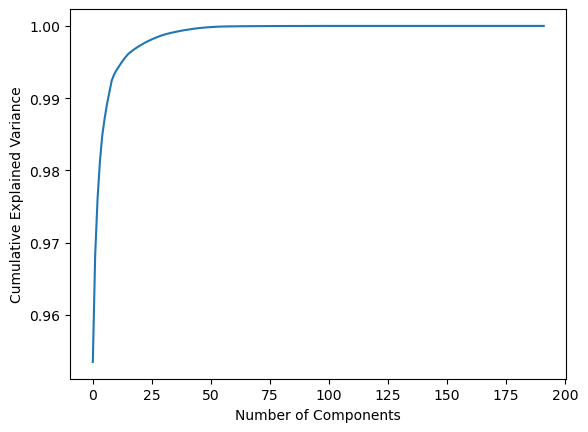

In [339]:
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(training_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [244]:
df.shape

(13211, 193)

In [50]:
## get data

"""
*** Check test size ++ data=df + inference data if used. ***
"""
test_size = 0.2
#print(df.shape)

#df, training_data, testing_data, validation_data = get_data(bucket, inference_data, test_size=0.2, data=df, training=1)#, data=df

## for inference
validation_data = get_data(bucket, inference_data, test_size=0.2, training=0)#, data=df


*** getting data ***


,master_case_number,full_year_liability_per_case,case_count,mcase_age,calc_and_collection,maintenance_direct,amount_to_pay_until_ar,last_assessed_annual_income,age,weekly_liability_amt,...,liability_due_std,liability_due_min,liability_due_max,liability_due_sum,liability_allocated_mean,liability_allocated_median,liability_allocated_std,liability_allocated_min,liability_allocated_max,liability_allocated_sum
0,1-6631597469,3606.0,1,2144.0,1,0,3606.0,30065.0,1977,69.0,...,145.0,0.0,306.0,2095.0,209.0,296.0,145.0,0.0,306.0,2095.0
1,1-14131709203,5413.0,3,1332.0,2,1,5413.0,28498.0,1982,104.0,...,217.0,0.0,460.0,3144.0,147.0,0.0,195.0,0.0,460.0,1470.0


Getting Inference Data 

validation data shape  (5000, 30)


In [51]:
validation_data = validation_data.iloc[:500,:]
display(validation_data)

,prev_rlq_percent_comp,cur_rlq_percent_comp,curr_rlq_paid,curr_rlq_due,direct_payment,change_income_when,full_year_liability_per_case,pwc_age_diff,dfb_failure_when,deo,...,compliance_notification_count,liability_due_4,liability_due_median,end_employer_when,sum_qc_age_group_3,standing_order_pmop,no_action_when,sr_open,credit_1,liability_allocated_sum
0,131.0,132.0,1189.0,899.0,0,0.0,3606.0,0,0.0,1,...,0.0,277.0,296.0,0.0,1.0,1,29.0,0.0,439.0,2095.0
1,94.0,101.0,1370.0,1350.0,0,0.0,5413.0,0,0.0,1,...,0.0,415.0,445.0,0.0,0.0,1,0.0,0.0,152.0,1470.0
2,125.0,118.0,826.0,697.0,0,0.0,3495.0,0,0.0,1,...,0.0,67.0,67.0,0.0,1.0,1,0.0,0.0,49.0,134.0
3,123.0,162.0,736.0,453.0,0,0.0,2486.0,0,0.0,0,...,0.0,211.0,197.0,0.0,2.0,0,0.0,1.0,294.0,744.0
4,97.0,100.0,108.0,107.0,0,56.0,431.0,0,0.0,0,...,0.0,33.0,34.0,0.0,0.0,1,0.0,1.0,43.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,104.0,140.0,684.0,488.0,0,0.0,2976.0,3,0.0,1,...,0.0,150.0,161.0,0.0,0.0,0,0.0,0.0,161.0,970.0
496,99.0,100.0,841.0,844.0,0,0.0,3384.0,0,0.0,1,...,1.0,260.0,139.0,0.0,0.0,1,0.0,0.0,278.0,491.0
497,116.0,139.0,544.0,391.0,0,0.0,1574.0,0,0.0,1,...,1.0,120.0,125.0,0.0,0.0,1,29.0,2.0,96.0,279.0
498,100.0,91.0,1125.0,1242.0,0,4.0,4982.0,0,0.0,0,...,0.0,382.0,410.0,0.0,0.0,0,0.0,3.0,350.0,1486.0


In [11]:
import pandas as pd

def find_duplicates(df):
    return df[df.duplicated(keep='first')]


duplicates = find_duplicates(df)
display(duplicates)


,master_case_number,target,prev_rlq_percent_comp,cur_rlq_percent_comp,curr_rlq_paid,curr_rlq_due,direct_payment,change_income_when,full_year_liability_per_case,pwc_age_diff,...,compliance_notification_count,liability_due_4,liability_due_median,end_employer_when,sum_qc_age_group_3,standing_order_pmop,no_action_when,sr_open,credit_1,liability_allocated_sum


In [139]:
def find_duplicates(df, subset=None):
    return df[df.duplicated(subset='master_case_number', keep='first')]


import pandas as pd

# def find_duplicates(df):
#     return df[df['master_case_number'].duplicated(keep=False)]


duplicates = find_duplicates(df)
display(duplicates['master_case_number'])

#11,960 duplicate

Series([], Name: master_case_number, dtype: object)

In [ ]:
# binary_cols = [col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]

# for i in binary_cols:
#     print(i)

In [ ]:
# df['a'] = df[['communication_method', 'self_service_user', 'dual_employed', 'employed']].max(axis=1)
# df['b'] = df[['no_employment_details', 'self_employed', 'unemployed', 'benefit_agency']].max(axis=1)
# df['c'] = df[['deo', 'der', 'direct_debit', 'direct_payment']].max(axis=1)
# df['d'] = df[['payment_offset', 'standing_order', 'voluntary_standing_order', 'bhoca']].max(axis=1)
# df['e'] = df[['benefit_agency_pmop', 'deo_pmop', 'der_pmop', 'direct_debit_pmop']].max(axis=1)
# df['f'] = df[['direct_payment_pmop', 'standing_order_pmop', 'voluntary_standing_order_pmop', 'cofc_ind', 'shared_care_band']].max(axis=1)
# df = df.drop(binary_cols, axis=1)


In [ ]:
# df = df.drop(binary_cols, axis=1)


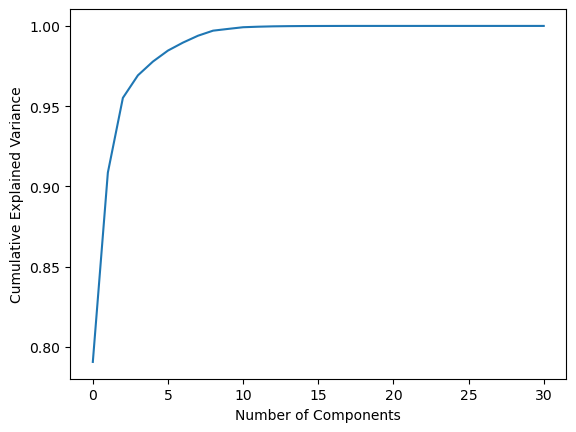

In [23]:
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(training_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [24]:
## check target value counts
display(training_data['target'].value_counts())

target
1    5179
0    5179
Name: count, dtype: int64

In [25]:
## create pointers to data in S3
s3_input_train, s3_input_test = get_data_pointer(bucket)


In [26]:
## Define model
xgb = model()


defining model


NOTEBOOK_METADATA_FILE detected but failed to get valid domain and user from it.


In [27]:
# 100 features + RLQ
#89,77
# 27 features + RLQ features
#94,78
# 27 features 
#81,69
# j data v3 april+may all featutres - RLQ - features ID'd by DIY feature anaysis
#91,69
## j data v3 april+may all featutres - RLQ
#93,72
# J data April v3 all features - current RLQ
#96,71
#96,77

## Fit model ## there are also AUC values for training and validation data for different datasets and model hyps.
#927,901 # 30 features  smote = 0.7
#882,861 # 10 features
#937,884 # 20 features
#954,906 # 30 features
#961,911 # 40 features
#969,918 # 50 features
#973,916 # 60 features
#988,941 # panashe data
#988,939

## gamma set to 4. 
xgb = fit_model(xgb, s3_input_train, s3_input_test)
#96,79 SMOTE = 0.6 97,80 SMOTE 0.9

# 94,74 on may data 
# 98,85 on may data all features gamma =4 
# 96, 85 april data all features gamma = 5

# april and may data all features gamma = 5

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-09-28-12-52-20-276


fitting model
2023-09-28 12:52:20 Starting - Starting the training job...
2023-09-28 12:52:45 Starting - Preparing the instances for training......
2023-09-28 12:53:43 Downloading - Downloading input data...
2023-09-28 12:54:03 Training - Downloading the training image...
2023-09-28 12:54:39 Training - Training image download completed. Training in progress...[2023-09-28 12:54:58.060 ip-10-0-96-117.eu-west-2.compute.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-09-28 12:54:58.133 ip-10-0-96-117.eu-west-2.compute.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2023-09-28:12:54:58:INFO] Imported framework sagemaker_xgboost_container.training
[2023-09-28:12:54:58:INFO] Failed to parse hyperparameter eval_metric value auc to Json.
Returning the value itself
[2023-09-28:12:54:58:INFO] Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
[2023-09-28:12:54:58:INFO] Running XGBoost Sagemaker in a

In [28]:
## deploy model.
xgb_predictor = deploy_model(xgb)


INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-09-28-12-58-08-020


deploying model


INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2023-09-28-12-52-20-276
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2023-09-28-12-52-20-276


----!

In [29]:
## get last job name for other functions later. 11:45 friday 
job_name = xgb.latest_training_job.job_name
print(job_name)

sagemaker-xgboost-2023-09-28-12-52-20-276


In [53]:
## make new predictions
predsout = predictions(xgb_predictor, validation_data)


making predictions


In [55]:
print(predsout)

                  preds
0    0.6520800590515137
1    0.5350894331932068
2    0.6014241576194763
3    0.7030336856842041
4    0.9957584738731384
..                  ...
496  0.5490400791168213
497  0.6607624888420105
498  0.9609426856040955
499  0.9693283438682556
500                    

[501 rows x 1 columns]


In [52]:
display(validation_data)

,prev_rlq_percent_comp,cur_rlq_percent_comp,curr_rlq_paid,curr_rlq_due,direct_payment,change_income_when,full_year_liability_per_case,pwc_age_diff,dfb_failure_when,deo,...,compliance_notification_count,liability_due_4,liability_due_median,end_employer_when,sum_qc_age_group_3,standing_order_pmop,no_action_when,sr_open,credit_1,liability_allocated_sum
0,131.0,132.0,1189.0,899.0,0,0.0,3606.0,0,0.0,1,...,0.0,277.0,296.0,0.0,1.0,1,29.0,0.0,439.0,2095.0
1,94.0,101.0,1370.0,1350.0,0,0.0,5413.0,0,0.0,1,...,0.0,415.0,445.0,0.0,0.0,1,0.0,0.0,152.0,1470.0
2,125.0,118.0,826.0,697.0,0,0.0,3495.0,0,0.0,1,...,0.0,67.0,67.0,0.0,1.0,1,0.0,0.0,49.0,134.0
3,123.0,162.0,736.0,453.0,0,0.0,2486.0,0,0.0,0,...,0.0,211.0,197.0,0.0,2.0,0,0.0,1.0,294.0,744.0
4,97.0,100.0,108.0,107.0,0,56.0,431.0,0,0.0,0,...,0.0,33.0,34.0,0.0,0.0,1,0.0,1.0,43.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,104.0,140.0,684.0,488.0,0,0.0,2976.0,3,0.0,1,...,0.0,150.0,161.0,0.0,0.0,0,0.0,0.0,161.0,970.0
496,99.0,100.0,841.0,844.0,0,0.0,3384.0,0,0.0,1,...,1.0,260.0,139.0,0.0,0.0,1,0.0,0.0,278.0,491.0
497,116.0,139.0,544.0,391.0,0,0.0,1574.0,0,0.0,1,...,1.0,120.0,125.0,0.0,0.0,1,29.0,2.0,96.0,279.0
498,100.0,91.0,1125.0,1242.0,0,4.0,4982.0,0,0.0,0,...,0.0,382.0,410.0,0.0,0.0,0,0.0,3.0,350.0,1486.0


In [54]:
## show output metrics

con_matrix(xgb, validation_data, predsout, bucket)

# 0       0.83      0.79      0.81       734
# 1       0.64      0.69      0.66       395
#    accuracy    75

# 0       0.82      0.73      0.77       734
# 1       0.59      0.70      0.64       395

#     accuracy 0.72 


## May data all features full SMOTE
# 0       0.76      0.78      0.77       370
# 1       0.78      0.76      0.77       386

#    accuracy 0.77 
   
## April data all features full SMOTE gamma 5 40 rounds 
# 0       0.74      0.81      0.77       370
# 1       0.80      0.74      0.77       386

#     accuracy 0.77  
   
#  0       0.86      0.88      0.87       741
# 1       0.88      0.87      0.87       771

#     accuracy    0.87   
   

con matrix


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(


 classification_report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
          90       0.00      0.00      0.00       2.0
          91       0.00      0.00      0.00       7.0
          92       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       6.0
          94       0.00      0.00      0.00       4.0
          95       0.00      0.00      0.00      11.0
          97       0.00      0.00      0.00       7.0
          98       0.00      0.00      0.00       4.0
          99       0.00      0.00      0.00      23.0
         100       0.00      0.00      0.00      15.0
         101       0.00      0.00      0.00       9.0
         102       0.00      0.00      0.00      20.0
         103       0.00      0.00      0.00      14.0
         104       0.00      0.00      0.00      11.0
         105       0.00      0.00      0.00       7.0


KeyboardInterrupt: 

In [234]:
## target class 1 has a high number of cur_rlq_percent_comp counts.
display(df['target'] [df.cur_rlq_percent_comp < 95 ].value_counts())

AttributeError: 'DataFrame' object has no attribute 'cur_rlq_percent_comp'

permutation_importance
get pre-trained model
***  job name *** sagemaker-xgboost-2023-09-21-13-45-12-249


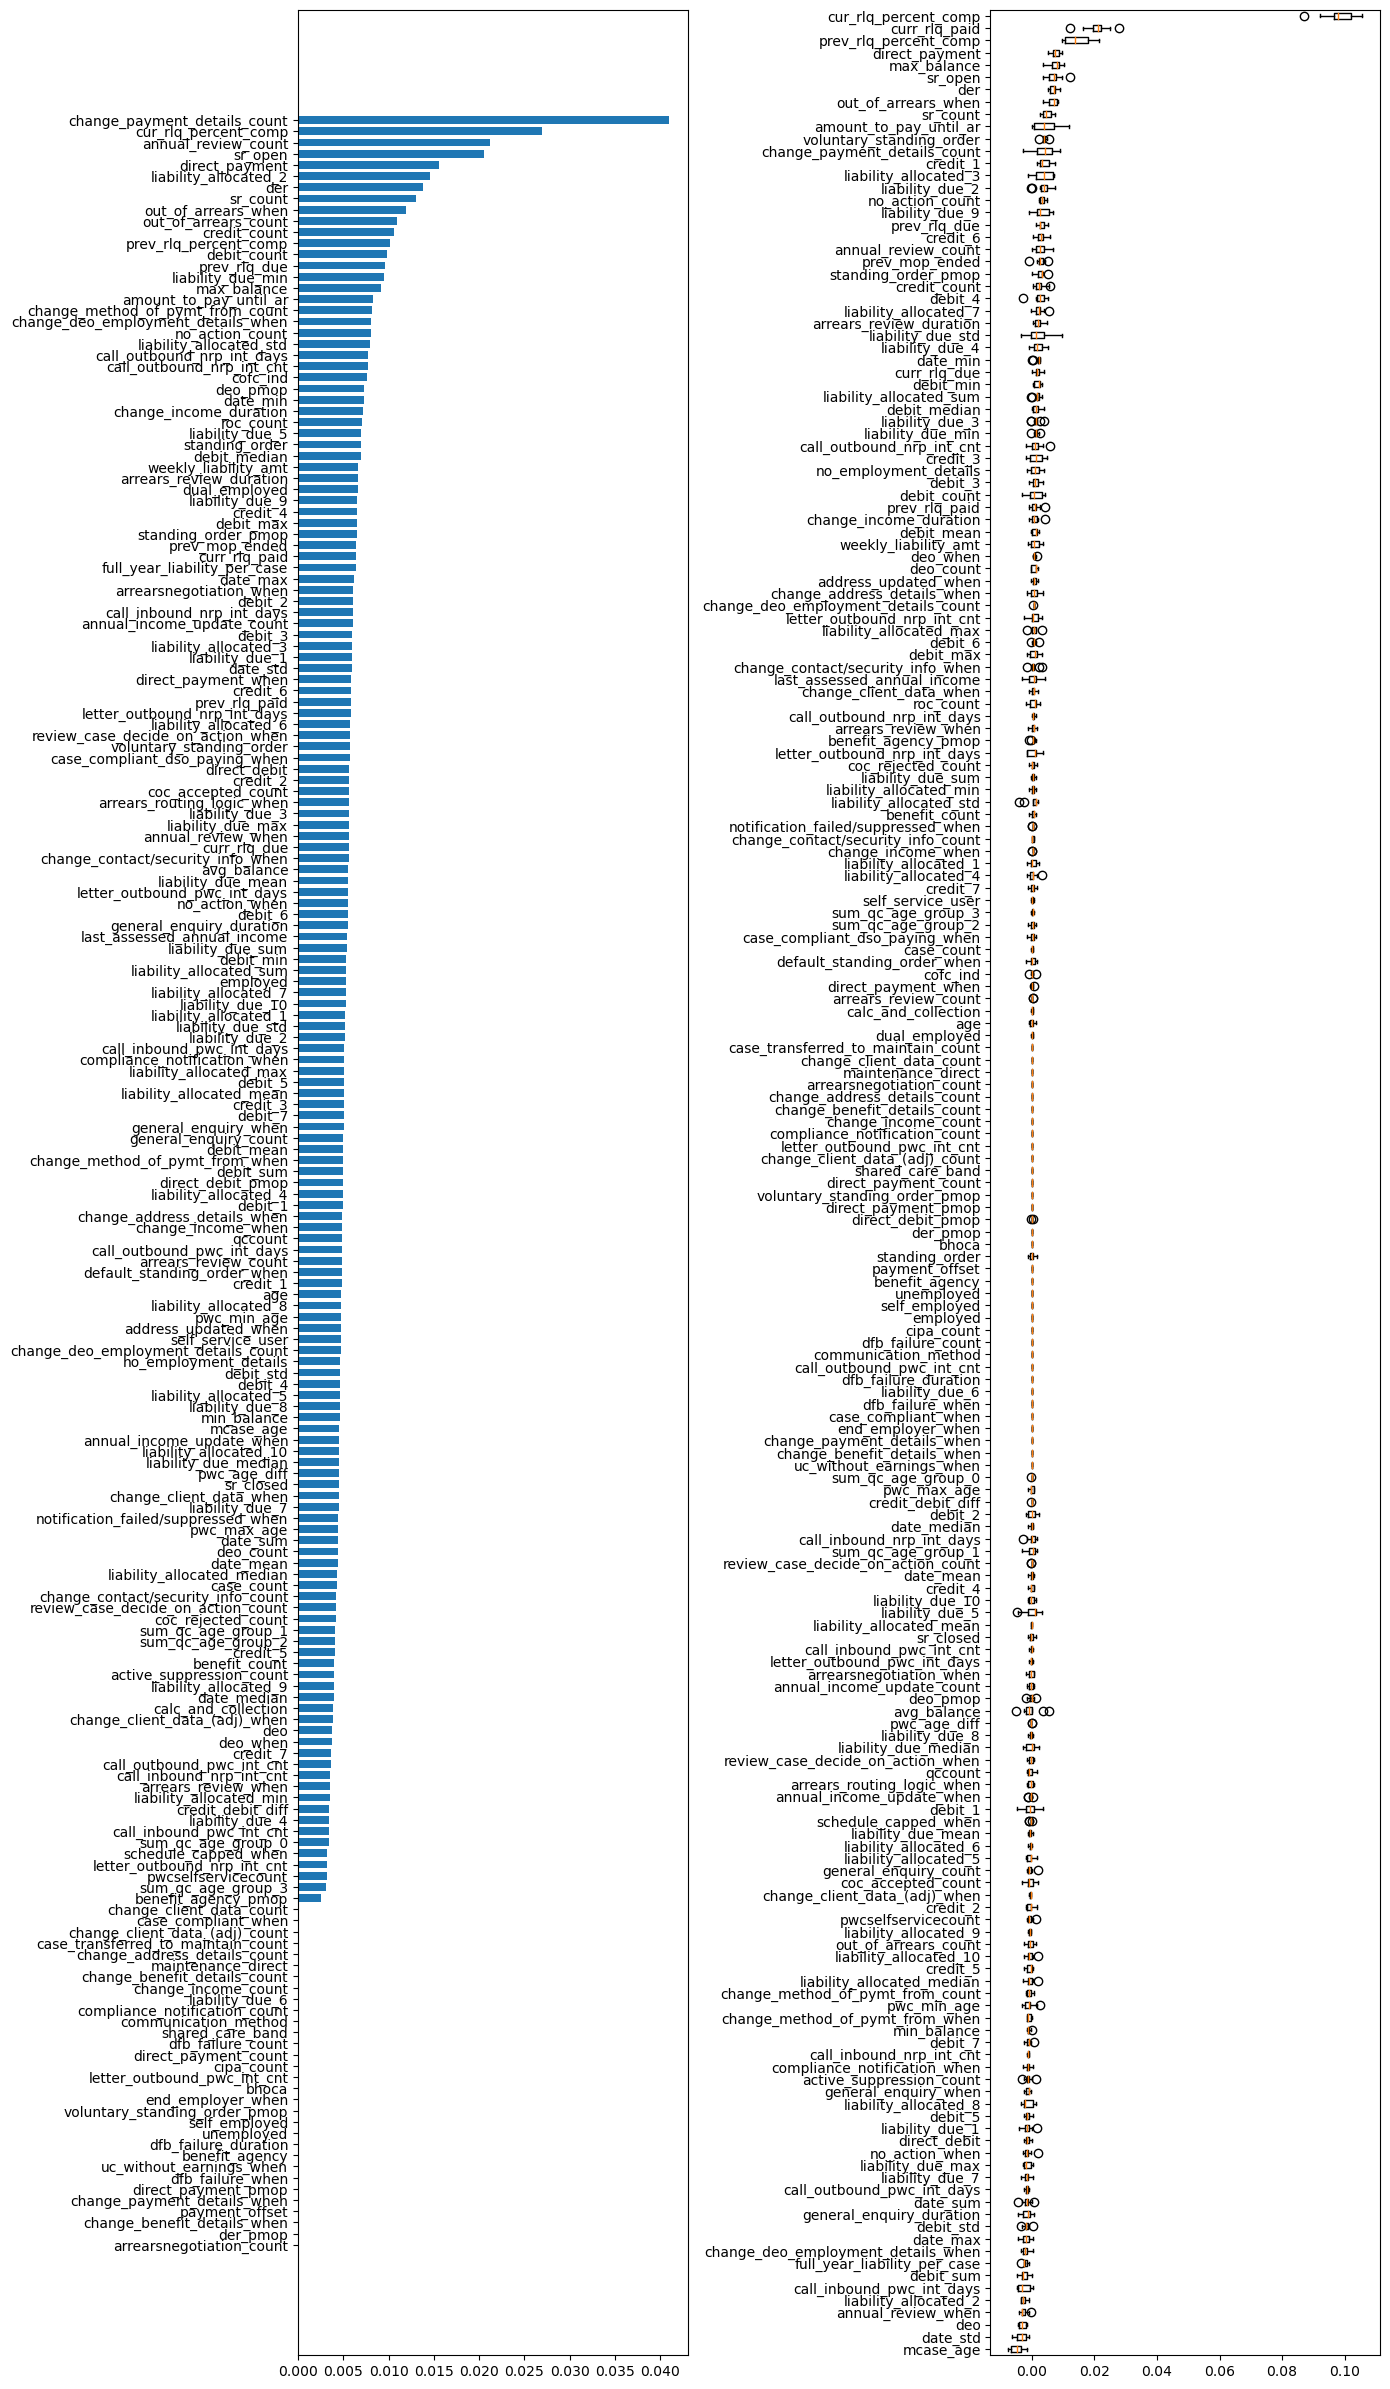

In [335]:
## permutation_importance.
permutation_importance(xgb, validation_data, bucket)


hierarchy_clustering
get pre-trained model
***  job name *** sagemaker-xgboost-2023-09-20-09-24-13-316
(26, 26)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


Accuracy on test data: 0.6366

 Clusters: 

['direct_payment', 'standing_order_pmop'] 

['change_income_when', 'call_inbound_pwc_int_cnt', 'sr_open'] 

['full_year_liability_per_case', 'credit_4', 'debit_std', 'credit_1'] 

['pwc_age_diff', 'sum_qc_age_group_3'] 

['dfb_failure_when', 'dfb_failure_duration'] 

['deo', 'liability_allocated_1', 'no_action_when'] 

['annual_review_count', 'unemployed'] 

['out_of_arrears_when', 'compliance_notification_count'] 

['deo_when', 'end_employer_when'] 

['liability_allocated_median', 'liability_allocated_sum'] 

['liability_due_4', 'liability_due_median'] 


 selected_features:  ['direct_payment', 'change_income_when', 'full_year_liability_per_case', 'pwc_age_diff', 'dfb_failure_when', 'deo', 'annual_review_count', 'out_of_arrears_when', 'deo_when', 'liability_allocated_median', 'liability_due_4']

 length of selected features 11 / 26

 Accuracy on test data with features removed: 0.5743


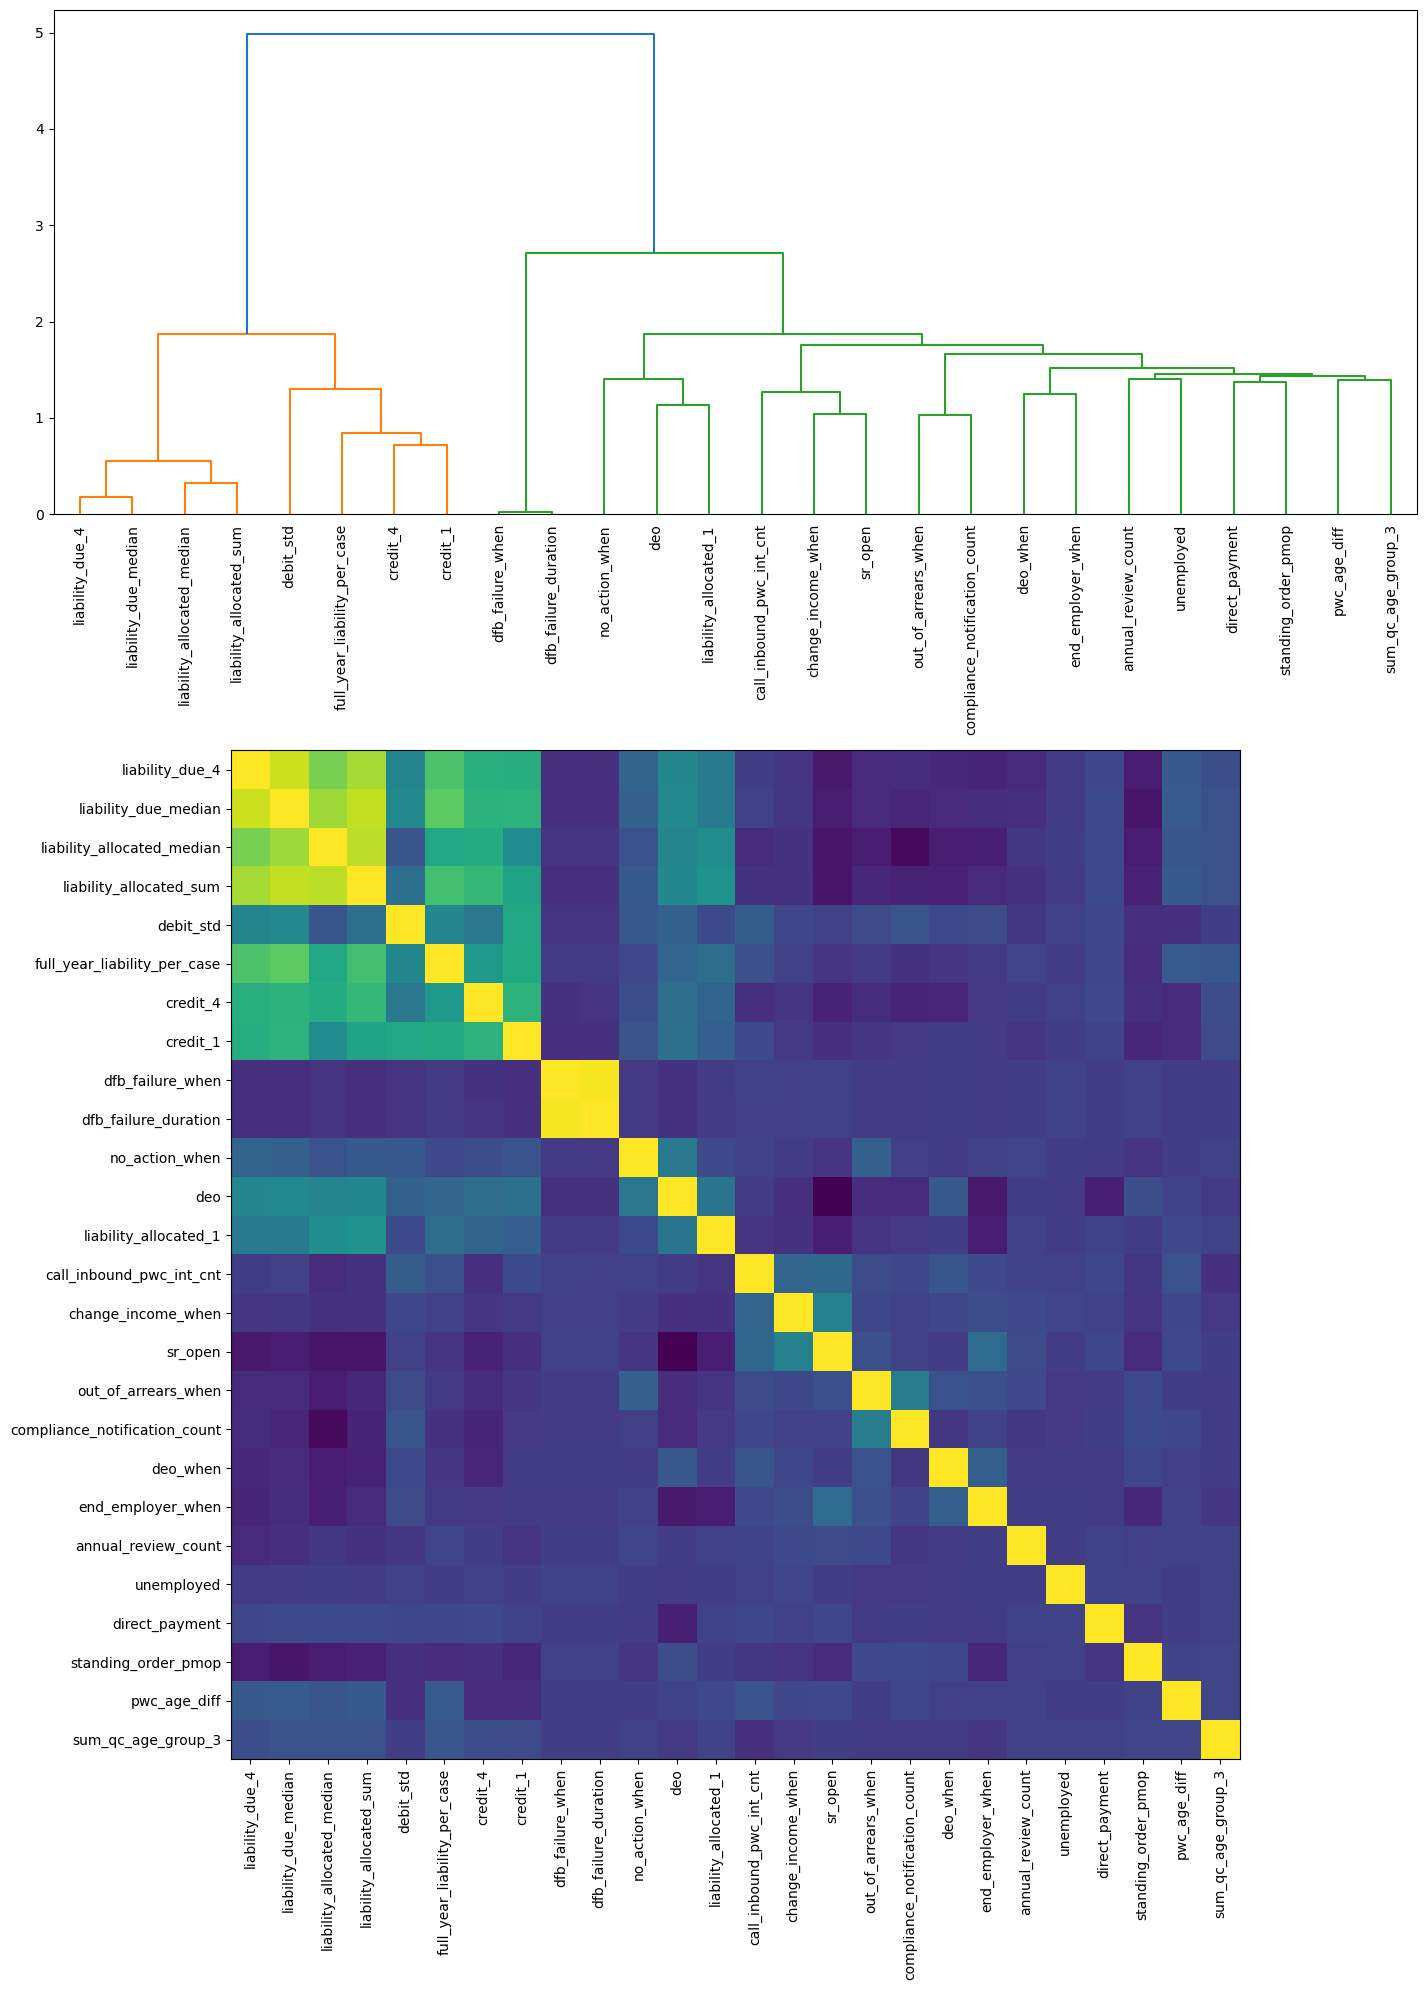

In [279]:
hierarchy_clustering(xgb, training_data, validation_data, bucket)


diy_feature_importance
get pre-trained model
***  job name *** sagemaker-xgboost-2023-09-20-11-35-54-791
prev_rlq_percent_comp
cur_rlq_percent_comp
curr_rlq_paid
curr_rlq_due
direct_payment
change_income_when
full_year_liability_per_case
pwc_age_diff
dfb_failure_when
deo
credit_4
dfb_failure_duration
debit_std
liability_allocated_1
call_inbound_pwc_int_cnt
annual_review_count
unemployed
out_of_arrears_when
deo_when
liability_allocated_median
compliance_notification_count
liability_due_4
liability_due_median
end_employer_when
sum_qc_age_group_3
standing_order_pmop
no_action_when
sr_open
credit_1
liability_allocated_sum
benchmark_score:  0.7021445591739476

 test_results: 
                                 0    Scores
17            out_of_arrears_when  0.675139
0           prev_rlq_percent_comp  0.676728
1            cur_rlq_percent_comp  0.679905
5              change_income_when  0.681493
23              end_employer_when  0.682288
10                       credit_4  0.683479
4          

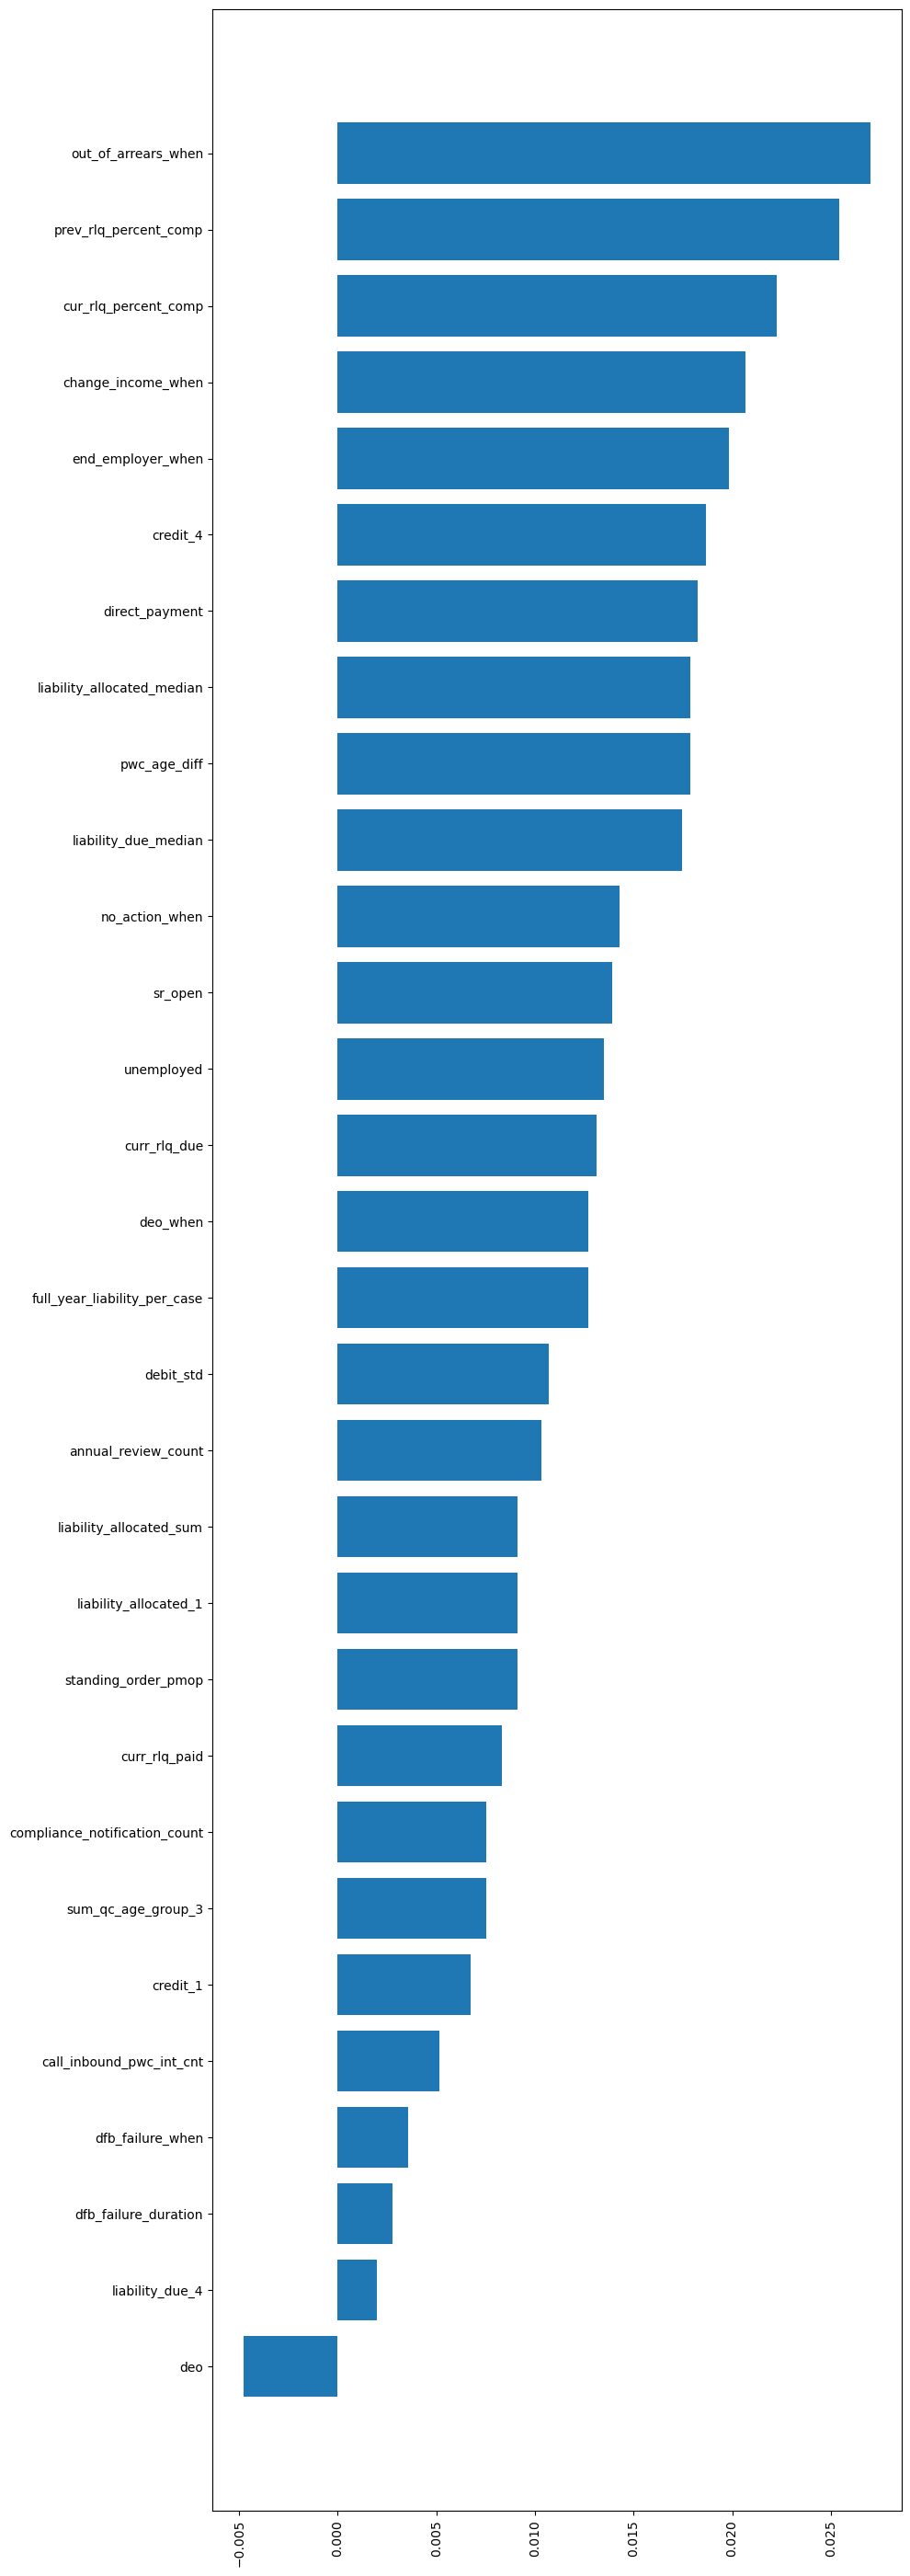

In [304]:
testscores2 = diy_feature_importance(xgb, training_data, testing_data, bucket)


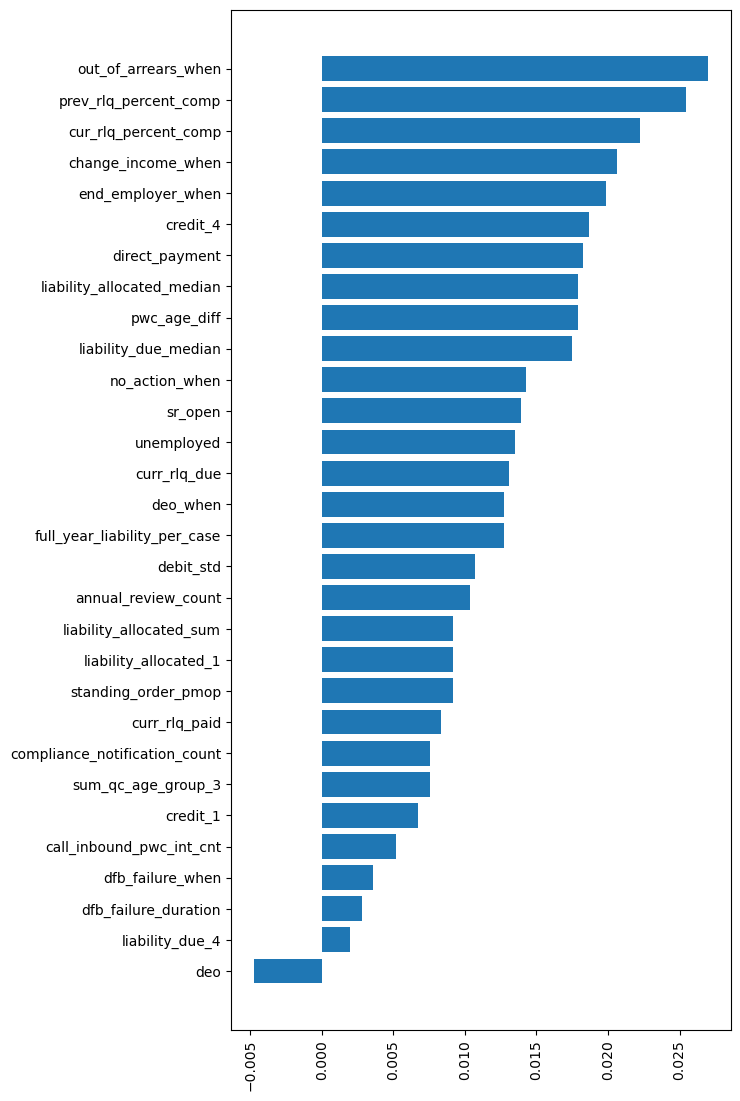

In [314]:
## Create a list of column names
cols = testing_data.columns.drop('target')
cols_df = pd.DataFrame(cols)

scores_df = pd.DataFrame(testscores2, columns=['Scores'])
scores_df = pd.concat([cols_df, scores_df], axis=1)
scores_df.sort_values(by='Scores', ascending=True, inplace=True)

# Create a bar plot of the scores
fig, ax = plt.subplots(figsize=(10, 15))
fig.subplots_adjust(left=0.4)
fig.subplots_adjust(bottom=0.2)
plt.xticks(rotation=90)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
#xticklabels = [f'{x:.2f}' for x in ax.get_xticks()]

ax.barh(scores_df[0], scores_df['Scores'])

plt.show()

### Evaluate trained model

In [239]:
scores_df

,0,Scores
83,self_employed,-0.014297
91,letter_outbound_nrp_int_days,-0.013900
38,min_balance,-0.013900
87,coc_accepted_count,-0.013900
97,liability_allocated_8,-0.013106
...,...,...
79,liability_allocated_mean,0.012311
3,liability_due_4,0.012708
75,deo_count,0.013106
4,prev_mop_ended,0.013900


In [282]:
bob = list(scores_df[0][scores_df['Scores'] > 0])

with pd.option_context("display.max_rows", None):
    display(bob)

print(len(bob))

['liability_due_median',
 'call_inbound_pwc_int_cnt',
 'dfb_failure_when',
 'pwc_age_diff',
 'sum_qc_age_group_3',
 'liability_due_4',
 'change_income_when',
 'compliance_notification_count',
 'end_employer_when',
 'liability_allocated_sum',
 'debit_std',
 'out_of_arrears_when',
 'no_action_when',
 'dfb_failure_duration',
 'standing_order_pmop',
 'deo',
 'credit_1',
 'unemployed',
 'deo_when',
 'liability_allocated_1',
 'liability_allocated_median',
 'full_year_liability_per_case',
 'credit_4',
 'annual_review_count',
 'direct_payment',
 'sr_open']

26


In [ ]:
s3_key = 'model_artefacts'
evaluate_model_and_upload(xgb, validation_data, bucket, s3_key)


# Delete Endpoint !!


In [352]:
# Delete Endpoint !!
delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2023-09-22-12-21-01-385
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2023-09-22-12-21-01-385
